# Belastingen uit matroos

## 1. Voorbeeld met CSV
Lees de configuratie in:

Dit leest een configuratie bestand `belasting_noos_matroos_config.yaml` in. 
```yaml
GlobalVariables:
    rootdir: "data_sets" 
    moments: [-24,0,24,48]  

    csv:
        delimiter: ","

    LoadsMatroos:
        website: "noos"
        source: "observed"
        parameters: ["waterlevel"]
        MISSING_VALUE: 999


DataAdapter: 
    BelastingLocaties: 
        type: csv
        path: "belastingen_matroos.csv"
    Waterstanden: 
        type: csv
        path: "waterstanden.csv"

```

In [1]:
from pathlib import Path

from toolbox_continu_inzicht import Config

test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_noos_matroos_config.yaml")
c.lees_config()

Zet de data adapter klaar en geef deze de configuratie mee 

In [2]:
from toolbox_continu_inzicht import DataAdapter

data = DataAdapter(config=c)

Run de module met CSV

In [3]:
from toolbox_continu_inzicht.loads import LoadsMatroos

matroos = LoadsMatroos(
    data_adapter=data, input="BelastingLocaties", output="Waterstanden"
)

In [4]:
matroos.df_in

In [5]:
ds = await matroos.run()

In [35]:
df = matroos.df_out

In [37]:
df

,object_id,object_type,meetlocatie_naam,parameter_naam,datetime,waarde,type_waarde,bron_naam
0,7,meetlocatie,Hoek van Holland,waterlevel,2024-10-24 07:00:00+00:00,0.78,meting,observed
1,7,meetlocatie,Hoek van Holland,waterlevel,2024-10-24 07:10:00+00:00,0.74,meting,observed
2,7,meetlocatie,Hoek van Holland,waterlevel,2024-10-24 07:20:00+00:00,0.70,meting,observed
3,7,meetlocatie,Hoek van Holland,waterlevel,2024-10-24 07:30:00+00:00,0.66,meting,observed
4,7,meetlocatie,Hoek van Holland,waterlevel,2024-10-24 07:40:00+00:00,0.62,meting,observed
...,...,...,...,...,...,...,...,...
579,1,meetlocatie,Delfzijl,waterlevel,2024-10-25 06:30:00+00:00,0.58,meting,observed
580,1,meetlocatie,Delfzijl,waterlevel,2024-10-25 06:40:00+00:00,0.50,meting,observed
581,1,meetlocatie,Delfzijl,waterlevel,2024-10-25 06:50:00+00:00,0.40,meting,observed
582,1,meetlocatie,Delfzijl,waterlevel,2024-10-25 07:00:00+00:00,0.31,meting,observed


In [8]:
df_plot = df[df["meetlocatie_naam"] == "Hoek van Holland"]

In [9]:
import numpy as np  # type: ignore

values_nan = df_plot[df_plot["waarde"] == 999].index
for val in values_nan:
    df_plot.loc[val, "waarde"] = np.nan

<Axes: >

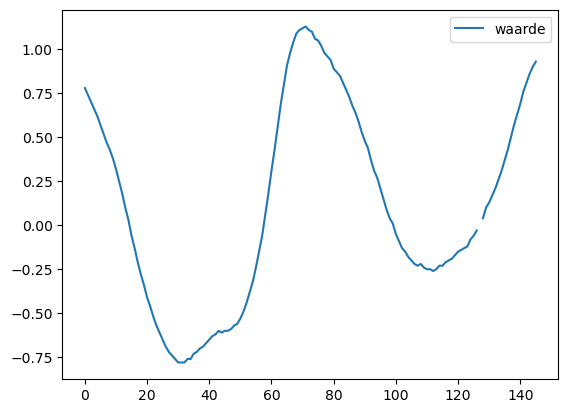

In [10]:
df_plot[["waarde"]].plot()

### Dit waren alleen metingen, herhaal nu met dataset met ook voorspellingen

Dit leest een configuratie bestand `belasting_noos_matroos_config_fcst.yaml` in. 
```yaml
GlobalVariables:
    rootdir: "data_sets" 
    moments: [-24,0,24,48]  

    csv:
        delimiter: ","

    LoadsMatroos:
        website: "noos"
        source: "dcsm6_kf"
        parameters: ["waterlevel"]
        MISSING_VALUE: 999


DataAdapter: 
    BelastingLocaties: 
        type: csv
        path: "belastingen_matroos.csv"
    Waterstanden: 
        type: csv
        path: "waterstanden.csv"

```

In [11]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_noos_matroos_fcst_config.yaml")
c.lees_config()
data = DataAdapter(config=c)

matroos_fsct = LoadsMatroos(
    data_adapter=data, input="BelastingLocaties", output="Waterstanden"
)

In [13]:
await matroos_fsct.run()

In [18]:
df_fcst = matroos_fsct.df_out
df_plot_fcst = df_fcst[df_fcst["meetlocatie_naam"] == "Hoek van Holland"]
values_nan = df_plot_fcst[df_plot_fcst["waarde"] == 999].index
for val in values_nan:
    df_plot_fcst.loc[val, "waarde"] = np.nan

<Axes: >

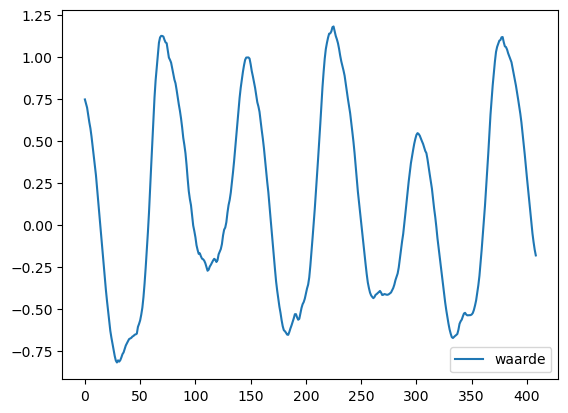

In [19]:
df_plot_fcst[["waarde"]].plot()

##### vergelijk de twee 

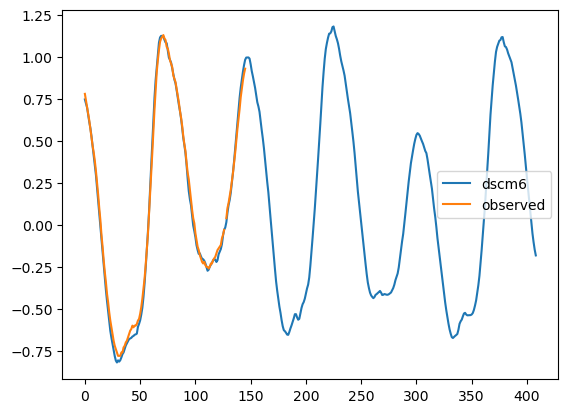

In [20]:
ax = df_plot_fcst[["waarde"]].plot()
df_plot[["waarde"]].plot(ax=ax)
ax.legend(["dscm6", "observed"]);

#### werkt ook met vitaal.matroos.rws
werkt alleen als je in de `.env` username & password mee geeft
```yaml
vitaal_user: "..."
vitaal_password: "..."
```

en de website aanpassen

```yaml
LoadsMatroos:
        website: "vitaal" 


```

In [21]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_vitaal_matroos_fcst_config.yaml")
c.lees_config()
data = DataAdapter(config=c)

vitaal_fsct = LoadsMatroos(
    data_adapter=data, input="BelastingLocaties", output="Waterstanden"
)

In [22]:
await vitaal_fsct.run()

In [23]:
df_vitaal_fcst = vitaal_fsct.df_out
df_plot_vitaal = df_vitaal_fcst[
    df_vitaal_fcst["meetlocatie_naam"] == "Hoek van Holland"
]
values_nan = df_plot_vitaal[df_plot_vitaal["waarde"] == 999].index
for val in values_nan:
    df_plot_vitaal.loc[val, "waarde"] = np.nan

in dit geval indentiek:

<Axes: >

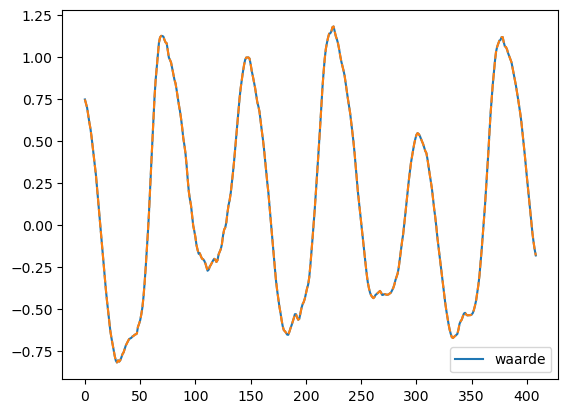

In [25]:
ax = df_plot_fcst[["waarde"]].plot()
df_plot_vitaal["waarde"].plot(ls="--", ax=ax)

In [26]:
from toolbox_continu_inzicht.loads import get_matroos_locations

In [27]:
gdf = await get_matroos_locations(parameter="waterlevel", source="dcsm6_kf")

In [28]:
gdf

,geometry,object_id,meetlocatie_naam
0,POINT Z (3.81011 55.39894 0),511,A121
1,POINT Z (-2.07333 57.14333 0),38,Aberdeen
2,POINT Z (0.78556 57.26056 0),111,anasuria
3,POINT Z (3.29 51.36278 0),2160,appelzak
4,POINT Z (2.06556 56.39972 0),48,Aukfield platform
...,...,...,...
176,POINT Z (6.65388 53.56998 0),1879,Eemsboei 17
177,POINT Z (6.79509 53.50673 0),1880,Eemsboei 27
178,POINT Z (6.83702 53.48027 0),1881,Eemsboei 30
179,POINT Z (7.00684 53.32695 0),1882,Eemsboei 51


In [29]:
from toolbox_continu_inzicht.loads.loads_matroos.get_matroos_locations import (
    get_matroos_sources,
)

In [30]:
df = await get_matroos_sources()

In [33]:
df[["source_label"]]

,source_label
0,bma2_05
1,bma2_25
2,bma2_50
3,bma2_75
4,bma2_95
...,...
178,wdij_wind
179,wind_dsc_wdij
180,zeedelta_v1
181,swan_zuno
